In [10]:
import matplotlib.pylab as pyl
import numpy as np
from scipy import signal

In [3]:
# Defining Parameters
A1 = 1 # message signal Amplitude
Ac = 2 # carrier signal Amplitude
fm = 10 # message signal frequency taken (10 Hz here)
fc = 10 * fm # carrier freq taken 10 times message signal frequency (100 Hz)
mod = 1 # Modulation index we take 1

fs = 100 * fm # sampling freq 100 times that of message signal(1000 Hz)
Ts = 1/fs # sampling time (0.001 sec)
t = pyl.arange(0,5/fm,Ts) # Generating the time vector for 5 periods of message signal (period =1/fm)

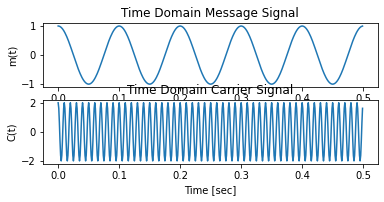

In [4]:
# Defining and Ploting message and carrier signals
message= A1*pyl.cos(2*pyl.pi*fm*t)
carrier =Ac*pyl.cos(2*pyl.pi*fc*t)

# show the graph
# modulation signal
pyl.subplot(311)
pyl.plot(t,message)
pyl.xlabel('Time [sec]')
pyl.ylabel('m(t)')
pyl.title('Time Domain Message Signal')

#carrier signal
pyl.subplot(312)
pyl.plot(t,carrier)
pyl.xlabel('Time [sec]')
pyl.ylabel('C(t)')
pyl.title('Time Domain Carrier Signal')

pyl.show()

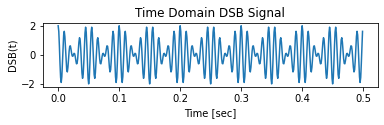

In [5]:
# Modulated function
modulated_func=mod*message*carrier

# show the Modulated function
pyl.subplot(311)
pyl.plot(t,modulated_func)
pyl.xlabel('Time [sec]')
pyl.ylabel('DSB(t)')
pyl.title('Time Domain DSB Signal')
pyl.show()

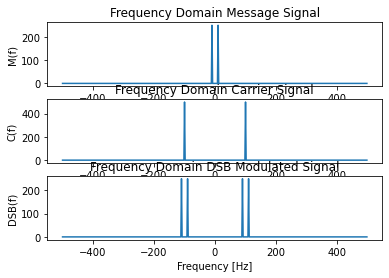

27


In [8]:
# % To plot the signals in frequency domain
modulated_func_frenq = np.fft.fftshift(np.fft.fft(modulated_func))# fourier transform  of DSB SC modolated signal shifted for period -pi to pi
message_frenq = np.fft.fftshift(np.fft.fft(message))# fourier transform  of message signal shifted for period -pi to pi
carrier_frenq = np.fft.fftshift(np.fft.fft(carrier))# fourier transform  of carrier signal shifted for period -pi to pi
frenq = np.arange(-fs/2, fs/2, fs/len(modulated_func_frenq)) # generating the frequency vector
                             
# To plot frequencies of message,carrier , DSB SC modulated signal in same plot
pyl.subplot(311)
pyl.plot(frenq,np.abs(message_frenq))
pyl.xlabel('Frequency [Hz]')
pyl.ylabel('M(f)')
pyl.title('Frequency Domain Message Signal')
                             
pyl.subplot(312)
pyl.plot(frenq,np.abs(carrier_frenq))
pyl.xlabel('Frequency [Hz]')
pyl.ylabel('C(f)')
pyl.title('Frequency Domain Carrier Signal')
                    
pyl.subplot(313)
pyl.plot(frenq,np.abs(modulated_func_frenq))
pyl.xlabel('Frequency [Hz]')
pyl.ylabel('DSB(f)')
pyl.title('Frequency Domain DSB Modulated Signal')
                            
pyl.show()


/var/folders/n4/p17_rp3120xdss8df_zjf4n80000gn/T/ipykernel_42246/435623173.py:16: UserWarning: Legend does not support 'D' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  pyl.legend("Demodulated DSB SC signal","Message signal")
/var/folders/n4/p17_rp3120xdss8df_zjf4n80000gn/T/ipykernel_42246/435623173.py:16: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  pyl.legend("Demodulated DSB SC signal","Message signal")
/var/folders/n4/p17_rp3120xdss8df_zjf4n80000gn/T/ipykernel_42246/435623173.py:16: UserWarning: Legend does not support 'm' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artis

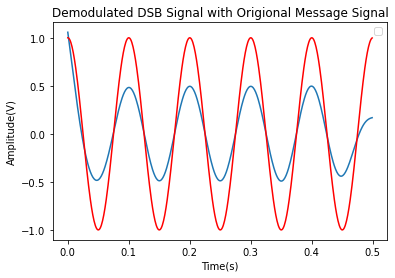

In [13]:
#  Demodulating the DSB SC signal using Coherent Detection
Vc = modulated_func * carrier

# We can also use Butterworth Filter
b, a = signal.butter(5,fm*3/fs,'low')
ym_rec = signal.filtfilt(b,a,Vc)
ym_rec = ym_rec - np.mean(ym_rec)
ym_rec =ym_rec/(np.power(Ac,2))

#show the demodulated signal in time domain
pyl.plot(t,ym_rec)
pyl.plot(t,message,'r')
pyl.xlabel('Time(s)')
pyl.ylabel('Amplitude(V)')
pyl.title('Demodulated DSB Signal with Origional Message Signal')
pyl.legend("Demodulated DSB SC signal","Message signal")
pyl.show()

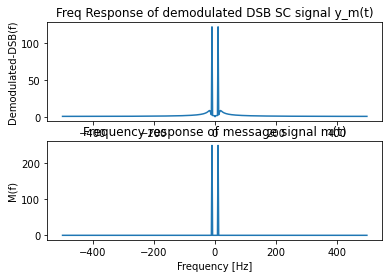

In [18]:
# To get the frequency
Nf = len(ym_rec)
ym_rec_fft = np.fft.fftshift(np.fft.fft(ym_rec,Nf))
f = np.fft.fftshift(np.fft.fftfreq(Nf,1/fs))

# to protray graph in frenq domain
pyl.subplot(211)
pyl.plot(f,abs(ym_rec_fft))
pyl.xlabel('Frequency [Hz]')
pyl.ylabel('Demodulated-DSB(f)')
pyl.title('Freq Response of demodulated DSB SC signal y_m(t)')

pyl.subplot(212)
pyl.plot(f,abs(message_frenq))
pyl.xlabel('Frequency [Hz]')
pyl.ylabel('M(f)')
pyl.title('Frequency response of message signal m(t)')
pyl.show()